In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

In [4]:
# Creating DataFrame df from CSV StandDF
corr_df = pd.read_csv('ReadyDF4', index_col=0)
target = pd.read_csv('Targets4', index_col=0)
corr_df = pd.concat([target, corr_df], axis=1, join_axes=[corr_df.index])





# Displaying first five results 
corr_df.head()

,I1,I2,I3,P_IPO,P_H,P_L,P_1DAY,Y1,Y2,C1,...,C7,C3',C5',C6',T4',T3',T5',S1',S2',S3'
0,AATI,ADVANCED ANALOGIC TECHNOLOGIES INC,3674.0,10.0,9.5,8.5,11.870000,0,1,0.462810,...,0.353538,1.0,0.476417,0.629630,0.534453,0.523574,0.466548,0.425373,0.436937,0.457490
1,ABPI,ACCENTIA BIOPHARMACEUTICALS INC,2834.0,8.0,10.0,8.0,7.250000,1,0,0.589876,...,0.281428,0.0,0.609551,0.000000,0.545989,0.887042,0.850134,0.492537,1.000000,0.854251
2,ACAD,ACADIA PHARMACEUTICALS INC,2834.0,7.0,14.0,12.0,6.700000,1,0,0.330579,...,0.184643,0.0,0.410536,0.000000,0.524832,0.216722,0.140946,0.417910,0.058559,0.137652
3,ACHN,ACHILLION PHARMACEUTICALS INC,2834.0,11.5,16.0,14.0,12.390000,1,1,0.822314,...,0.193850,0.0,0.401299,0.000000,0.265799,0.343041,0.305085,0.559701,0.175676,0.340081
4,ACLI,AMERICAN COMMERCIAL LINES INC.,4492.0,21.0,21.0,19.0,56.599998,0,1,0.289256,...,0.816776,1.0,0.458048,0.283333,0.393150,0.596766,0.493310,0.462687,0.581081,0.570850


In [17]:
#Calculate correlation with .corr(): 
print(corr_df.corr(method = 'spearman'))

              I3     P_IPO       P_H       P_L    P_1DAY        Y1        Y2  \
I3      1.000000  0.104972  0.007684  0.006254  0.065329 -0.095178  0.102731   
P_IPO   0.104972  1.000000  0.802979  0.804473  0.582183 -0.510881  0.025594   
P_H     0.007684  0.802979  1.000000  0.996201  0.400363 -0.078107 -0.099947   
P_L     0.006254  0.804473  0.996201  1.000000  0.403342 -0.076963 -0.101886   
P_1DAY  0.065329  0.582183  0.400363  0.403342  1.000000 -0.384212  0.446034   
Y1     -0.095178 -0.510881 -0.078107 -0.076963 -0.384212  1.000000 -0.231505   
Y2      0.102731  0.025594 -0.099947 -0.101886  0.446034 -0.231505  1.000000   
C1      0.049283 -0.091834 -0.068882 -0.066629  0.008691  0.077491  0.005024   
C2     -0.044778  0.268907  0.281331  0.292272  0.241249 -0.062170  0.073911   
C4     -0.036230 -0.002199 -0.039367 -0.043298 -0.000759 -0.071398  0.100703   
C7      0.022051  0.310082  0.420955  0.420373  0.140371  0.001734 -0.056342   
C3'     0.110866  0.159556  0.143288  0.

In [18]:
# Create the matrix of correlation score between the features and the label
corr_df.corr(method='spearman').style.format("{:.1}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,I3,P_IPO,P_H,P_L,P_1DAY,Y1,Y2,C1,C2,C4,C7,C3',C5',C6',T4',T3',T5',S1',S2',S3'
I3,1e+00,0.1,0.008,0.006,0.07,-0.1,0.1,0.05,-0.04,-0.04,0.02,0.1,0.04,0.1,0.09,0.1,0.1,0.002,0.03,0.07
P_IPO,0.1,1e+00,0.8,0.8,0.6,-0.5,0.03,-0.09,0.3,-0.002,0.3,0.2,0.03,0.5,0.005,0.2,0.2,0.2,0.2,0.2
P_H,0.008,0.8,1e+00,1e+00,0.4,-0.08,-0.1,-0.07,0.3,-0.04,0.4,0.1,-0.01,0.1,0.07,0.3,0.2,0.3,0.3,0.2
P_L,0.006,0.8,1e+00,1e+00,0.4,-0.08,-0.1,-0.07,0.3,-0.04,0.4,0.1,-0.01,0.1,0.07,0.3,0.3,0.3,0.3,0.2
P_1DAY,0.07,0.6,0.4,0.4,1e+00,-0.4,0.4,0.009,0.2,-0.0008,0.1,0.07,0.1,0.4,0.01,0.06,0.04,0.03,0.02,0.07
Y1,-0.1,-0.5,-0.08,-0.08,-0.4,1e+00,-0.2,0.08,-0.06,-0.07,0.002,-0.08,-0.06,-0.8,0.07,0.02,0.05,0.08,0.1,0.04
Y2,0.1,0.03,-0.1,-0.1,0.4,-0.2,1e+00,0.005,0.07,0.1,-0.06,0.03,0.09,0.2,-0.005,-0.05,-0.04,-0.07,-0.1,-0.04
C1,0.05,-0.09,-0.07,-0.07,0.009,0.08,0.005,1e+00,0.01,0.1,0.06,0.02,-0.007,-0.07,0.05,0.1,0.1,0.1,0.1,0.1
C2,-0.04,0.3,0.3,0.3,0.2,-0.06,0.07,0.01,1e+00,-0.03,0.2,0.01,0.1,0.1,0.04,0.2,0.2,0.2,0.1,0.2
C4,-0.04,-0.002,-0.04,-0.04,-0.0008,-0.07,0.1,0.1,-0.03,1e+00,0.009,-0.02,-0.04,0.08,0.08,0.03,0.05,0.05,0.02,0.06


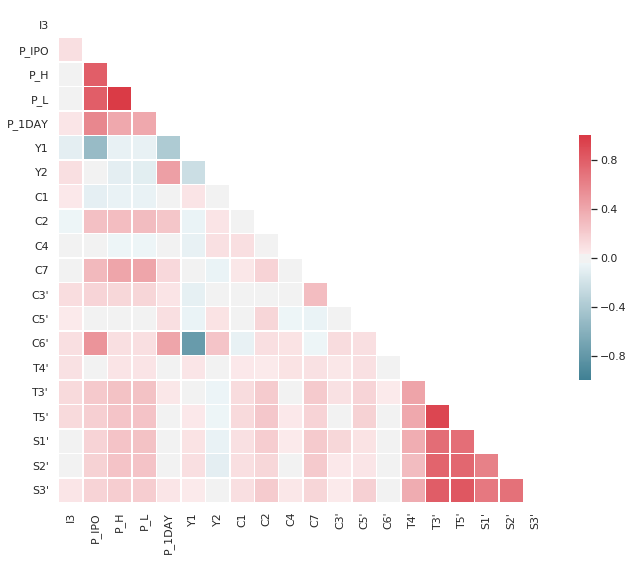

In [19]:

# Another correlation matrix
corr = corr_df.corr(method = 'spearman')

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.set(style="white")

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Set up the matplotlib figure
ax = plt.subplots(figsize=(11, 9))

# Draw the heatmap with the mask and aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax= 1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [20]:
# check if features are highly correlated with Target Variables using New_Df
##Y2 (>.5 or <-.5)

s1 = corr_df.corr()['Y1'] > 0.5 
s2 = corr_df.corr()['Y1'] < -0.5
s1 | s2 # logical OR

I3        False
P_IPO     False
P_H       False
P_L       False
P_1DAY    False
Y1         True
Y2        False
C1        False
C2        False
C4        False
C7        False
C3'       False
C5'       False
C6'        True
T4'       False
T3'       False
T5'       False
S1'       False
S2'       False
S3'       False
Name: Y1, dtype: bool

In [21]:
# check if features are highly correlated with Target Variables using New_Df
##Y2 (>.5 or <-.5)

s1 = corr_df.corr()['Y2'] > 0.5 
s2 = corr_df.corr()['Y2'] < -0.5
s1 | s2 # logical OR

I3        False
P_IPO     False
P_H       False
P_L       False
P_1DAY    False
Y1        False
Y2         True
C1        False
C2        False
C4        False
C7        False
C3'       False
C5'       False
C6'       False
T4'       False
T3'       False
T5'       False
S1'       False
S2'       False
S3'       False
Name: Y2, dtype: bool